# Загрузка Pandas и очистка данных

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

In [2]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [3]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [4]:
df_train = pd.read_csv('main_task.csv')
df_train.head()

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [6]:
sample_submission= pd.read_csv('sample_submission.csv')
sample_submission.head()

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [7]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant_id  10000 non-null  object 
 1   Rating         10000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [8]:
df_test= pd.read_csv('kaggle_task.csv')
df_test.head()

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      10000 non-null  object 
 1   City               10000 non-null  object 
 2   Cuisine Style      7693 non-null   object 
 3   Ranking            10000 non-null  float64
 4   Price Range        6525 non-null   object 
 5   Number of Reviews  9343 non-null   float64
 6   Reviews            9998 non-null   object 
 7   URL_TA             10000 non-null  object 
 8   ID_TA              10000 non-null  object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [10]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [12]:
data

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
49995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,4.5
49996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,3.5
49997,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,1,4.5
49998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,4.0


In [13]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
15681,id_2216,Prague,"['European', 'Czech']",2221.0,NaN,4.0,"[['Great atmosphere', 'A hidden gem'], ['11/06...",/Restaurant_Review-g274707-d4769071-Reviews-Re...,d4769071,1,4.5
37609,id_7226,Madrid,"['Japanese', 'Sushi']",7231.0,$$ - $$$,4.0,"[['The rice is awful'], ['07/17/2017']]",/Restaurant_Review-g187514-d10170188-Reviews-G...,d10170188,1,3.5
38082,id_2122,Budapest,"['Bar', 'Cafe', 'Fast Food']",2123.0,NaN,5.0,"[[""Don't expect to be pampered"", 'Nice place f...",/Restaurant_Review-g274887-d7369278-Reviews-Pa...,d7369278,1,3.0
38069,id_4401,Milan,['Italian'],4404.0,$$ - $$$,47.0,"[['A great Toscane restaurant', 'Lovely food']...",/Restaurant_Review-g187849-d3776179-Reviews-Su...,d3776179,1,3.5
5262,id_5262,Milan,"['Bar', 'Pub', 'Italian']",2281.0,$$ - $$$,77.0,"[['Super nice drinks and really good vibe', 'E...",/Restaurant_Review-g187849-d2555477-Reviews-Ca...,d2555477,0,0.0


# Cleaning and Prepping Data

## 1. Обработка NAN 

In [14]:
#перед обработкой NAN лучше вынести информацию о наличии пропуска 
#как отдельный признак 

data['Number_of_Reviews_isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')
data['reviews_isnan'] = pd.isna(data['Reviews']).astype('uint8')
data['price_range_isnan'] = pd.isna(data['Price Range']).astype('uint8')
data['cuisine_style_isnan'] = pd.isna(data['Cuisine Style']).astype('uint8')


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Restaurant_id            50000 non-null  object 
 1   City                     50000 non-null  object 
 2   Cuisine Style            38410 non-null  object 
 3   Ranking                  50000 non-null  float64
 4   Price Range              32639 non-null  object 
 5   Number of Reviews        46800 non-null  float64
 6   Reviews                  49998 non-null  object 
 7   URL_TA                   50000 non-null  object 
 8   ID_TA                    50000 non-null  object 
 9   sample                   50000 non-null  int64  
 10  Rating                   50000 non-null  float64
 11  Number_of_Reviews_isNAN  50000 non-null  uint8  
 12  reviews_isnan            50000 non-null  uint8  
 13  price_range_isnan        50000 non-null  uint8  
 14  cuisine_style_isnan   

In [35]:
df=data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Restaurant_id            50000 non-null  object 
 1   City                     50000 non-null  object 
 2   Cuisine Style            38410 non-null  object 
 3   Ranking                  50000 non-null  float64
 4   Price Range              32639 non-null  object 
 5   Number of Reviews        46800 non-null  float64
 6   Reviews                  49998 non-null  object 
 7   URL_TA                   50000 non-null  object 
 8   ID_TA                    50000 non-null  object 
 9   sample                   50000 non-null  int64  
 10  Rating                   50000 non-null  float64
 11  Number_of_Reviews_isNAN  50000 non-null  uint8  
 12  reviews_isnan            50000 non-null  uint8  
 13  price_range_isnan        50000 non-null  uint8  
 14  cuisine_style_isnan   

In [36]:
#приводим в опрятный вид название колонок

df.columns = ['id', 'city', 'cuisine_style', 'ranking', 'price_range', 
              'number_of_reviews', 'reviews', 'url_ta', 'id_ta', 'sample', 
              'rating', 'number_of_reviews_isnan', 'reviews_isnan', 
              'price_range_isnan', 'cuisine_style_isnan']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       50000 non-null  object 
 1   city                     50000 non-null  object 
 2   cuisine_style            38410 non-null  object 
 3   ranking                  50000 non-null  float64
 4   price_range              32639 non-null  object 
 5   number_of_reviews        46800 non-null  float64
 6   reviews                  49998 non-null  object 
 7   url_ta                   50000 non-null  object 
 8   id_ta                    50000 non-null  object 
 9   sample                   50000 non-null  int64  
 10  rating                   50000 non-null  float64
 11  number_of_reviews_isnan  50000 non-null  uint8  
 12  reviews_isnan            50000 non-null  uint8  
 13  price_range_isnan        50000 non-null  uint8  
 14  cuisine_style_isnan   

In [37]:
#в столбце reviews - почти нет нулевых значений, при этом в столбце 
# number_of_reviews их значительно больше. Очевидно, это пропуски. 
#посмотрим н распределение number_of_reviews:

df.number_of_reviews.value_counts()

2.0       2403
3.0       2042
4.0       1707
5.0       1471
6.0       1258
          ... 
5216.0       1
1932.0       1
1050.0       1
1145.0       1
1471.0       1
Name: number_of_reviews, Length: 1573, dtype: int64

In [38]:
df.number_of_reviews.describe()

count    46800.000000
mean       124.471197
std        294.114345
min          2.000000
25%          9.000000
50%         33.000000
75%        115.000000
max       9660.000000
Name: number_of_reviews, dtype: float64

<AxesSubplot:>

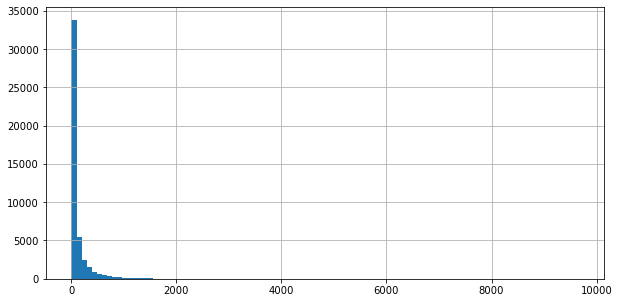

In [39]:
df['number_of_reviews'].hist(figsize=(10,5), bins=100)

Пропуски в number_of_reviews можно было заполнить разными способами (другие опции - среднее значение по городу или средняя/медиана по признаку), но самый простой и не увеличивающий показатель МАЕ способ - в случае, если в колонке Reviews есть ревью, а в колонке Number_of_reviews пусто, поставить туда 1 = то есть, как минимум одно ревью там точно есть. Если ревью нет совсем, то поставим О. Больше мы не знаем, и от чего может зависеть это количество - анализ этого не является нашей целевой задачей




In [40]:
#Заполним их не нулевым значением (1):

def number_reviews(row):
    if pd.isnull(row['number_of_reviews']):
        if row['reviews'] is None:
            return 0
        else:
            return 1
    return row['number_of_reviews']

df['number_of_reviews'] = df.apply(number_reviews, axis = 1)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       50000 non-null  object 
 1   city                     50000 non-null  object 
 2   cuisine_style            38410 non-null  object 
 3   ranking                  50000 non-null  float64
 4   price_range              32639 non-null  object 
 5   number_of_reviews        50000 non-null  float64
 6   reviews                  49998 non-null  object 
 7   url_ta                   50000 non-null  object 
 8   id_ta                    50000 non-null  object 
 9   sample                   50000 non-null  int64  
 10  rating                   50000 non-null  float64
 11  number_of_reviews_isnan  50000 non-null  uint8  
 12  reviews_isnan            50000 non-null  uint8  
 13  price_range_isnan        50000 non-null  uint8  
 14  cuisine_style_isnan   

In [41]:
#у нас остались пропуски в колонке reviews, которая по типу object, 
#и поэтому не пойдет в итоговую модель-после создания признаков на основе 
#reviews, эту колонку мы удалим. Позже, при обработке этой колонки, 
#заменим пропуски на None



### 2. Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [42]:
df.nunique(dropna=False)

id                         13094
city                          31
cuisine_style              10732
ranking                    12975
price_range                    4
number_of_reviews           1574
reviews                    41858
url_ta                     49963
id_ta                      49963
sample                         2
rating                        10
number_of_reviews_isnan        2
reviews_isnan                  2
price_range_isnan              2
cuisine_style_isnan            2
dtype: int64

В целом, потенциально под категории у нас может попасть только price_range, city и, может быть, rating
но pricerange & rating можно поставить по возрастанию, значит, категориальным остается только city

In [43]:
# посмотрим на ценовой диапазон:
df.price_range.value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: price_range, dtype: int64

In [44]:
#переводим price_range в цифровые значения, задав соответствующий словарь

price_range_dict = {}
price_range_dict = { '$':1, '$$ - $$$':2, '$$$$':3  }
df['price_range']= df['price_range'].replace(to_replace=price_range_dict)


In [45]:
df['price_range'].value_counts()

2.0    23041
1.0     7816
3.0     1782
Name: price_range, dtype: int64

/Users/Maria/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_range', ylabel='count'>

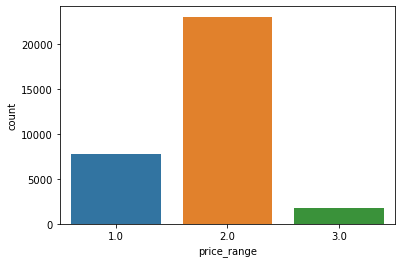

In [46]:
# посмотрим на распределения признака price_range:
sns.countplot(df['price_range'])

пустые значения price_range можно задать разным способом - выбрать наиболее частотный вариант 2 или заменить на 0.
Логичным будет заменить на наиболее частотный

In [47]:

df['price_range'] = df['price_range'].fillna(2)
df['price_range'].value_counts()

2.0    40402
1.0     7816
3.0     1782
Name: price_range, dtype: int64

In [48]:
#приведем в порядок столбец с кухнями:
df['cuisine_style']= df['cuisine_style'].str.replace('[', '')
df['cuisine_style']= df['cuisine_style'].str.replace(']', '')
df['cuisine_style']= df['cuisine_style'].str.replace("'", '')
df['cuisine_style']= df['cuisine_style'].fillna("Unknown")
df['cuisine_style'] = df['cuisine_style'].str.split(', ')

df['cuisine_style']

0                                               [Bar, Pub]
1        [European, Scandinavian, Gluten Free Options, ...
2                                    [Vegetarian Friendly]
3        [Italian, Mediterranean, European, Vegetarian ...
4        [Italian, Mediterranean, European, Seafood, Ve...
                               ...                        
49995    [Italian, Vegetarian Friendly, Vegan Options, ...
49996    [French, American, Bar, European, Vegetarian F...
49997                                    [Japanese, Sushi]
49998    [Polish, European, Eastern European, Central E...
49999                                            [Spanish]
Name: cuisine_style, Length: 50000, dtype: object

In [49]:
#добавим столбец с количеством кухонь
df['cuis_num'] = df.cuisine_style.apply(len)
df.cuis_num

0        2
1        5
2        1
3        5
4        6
        ..
49995    4
49996    5
49997    2
49998    5
49999    1
Name: cuis_num, Length: 50000, dtype: int64

In [50]:
df.cuis_num.describe()

count    50000.000000
mean         2.625320
std          1.824029
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         21.000000
Name: cuis_num, dtype: float64

In [51]:
#количество стилей кухонь от 1 до 21

/Users/Maria/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


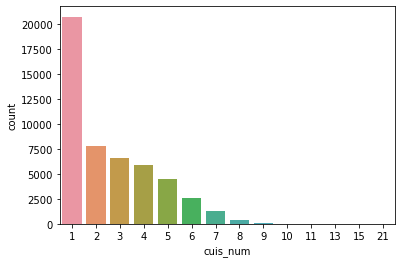

In [52]:
# посмотрим на распределения признака cuis_num:
sns.countplot(df['cuis_num']);

Очевидно, 21 - это выброс

In [53]:
#переходим к работе с reviews. 
#Сначала заменим пропуски на None
df.reviews = df.reviews.fillna('None')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       50000 non-null  object 
 1   city                     50000 non-null  object 
 2   cuisine_style            50000 non-null  object 
 3   ranking                  50000 non-null  float64
 4   price_range              50000 non-null  float64
 5   number_of_reviews        50000 non-null  float64
 6   reviews                  50000 non-null  object 
 7   url_ta                   50000 non-null  object 
 8   id_ta                    50000 non-null  object 
 9   sample                   50000 non-null  int64  
 10  rating                   50000 non-null  float64
 11  number_of_reviews_isnan  50000 non-null  uint8  
 12  reviews_isnan            50000 non-null  uint8  
 13  price_range_isnan        50000 non-null  uint8  
 14  cuisine_style_isnan   

In [54]:
#Выделим в отдельный столбец date_rev даты всех ревью

import re
pattern = re.compile("\d+\/\d+\/\d+")
df["date_rev"] = df["reviews"].apply(pattern.findall)
display(df["date_rev"].head())

0                          []
1    [12/05/2017, 10/29/2017]
2    [12/28/2017, 12/06/2017]
3    [12/06/2017, 11/22/2017]
4    [02/08/2018, 01/24/2018]
Name: date_rev, dtype: object

In [55]:
#отсортируем даты, чтобы первый элемент был во времени раньше, чем второй:
df["date_rev"] = df["date_rev"].apply(pd.to_datetime).apply(sorted)
df.date_rev



0                                                []
1        [2017-10-29 00:00:00, 2017-12-05 00:00:00]
2        [2017-12-06 00:00:00, 2017-12-28 00:00:00]
3        [2017-11-22 00:00:00, 2017-12-06 00:00:00]
4        [2018-01-24 00:00:00, 2018-02-08 00:00:00]
                            ...                    
49995    [2017-11-12 00:00:00, 2017-12-16 00:00:00]
49996    [2017-12-12 00:00:00, 2017-12-21 00:00:00]
49997    [2008-04-12 00:00:00, 2016-11-03 00:00:00]
49998    [2017-06-18 00:00:00, 2017-07-11 00:00:00]
49999    [2012-07-04 00:00:00, 2016-01-31 00:00:00]
Name: date_rev, Length: 50000, dtype: object

In [56]:
#Разделим столбец date_rev на два с двумя датами ревью:
df["rev_1"] = df["date_rev"].apply(lambda x: x[0] if len(x)>=1 else None)
df["rev_2"] = df["date_rev"].apply(lambda x: x[1] if len(x)==2 else None)
df.head()

,id,city,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,rating,number_of_reviews_isnan,reviews_isnan,price_range_isnan,cuisine_style_isnan,cuis_num,date_rev,rev_1,rev_2
0,id_0,Paris,"[Bar, Pub]",12963.0,2.0,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,0,0,0,0,2,[],NaT,NaT
1,id_1,Helsinki,"[European, Scandinavian, Gluten Free Options, ...",106.0,2.0,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,0,0,0,0,5,"[2017-10-29 00:00:00, 2017-12-05 00:00:00]",2017-10-29,2017-12-05
2,id_2,Edinburgh,[Vegetarian Friendly],810.0,2.0,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,0,0,0,0,1,"[2017-12-06 00:00:00, 2017-12-28 00:00:00]",2017-12-06,2017-12-28
3,id_3,London,"[Italian, Mediterranean, European, Vegetarian ...",1669.0,3.0,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,0,0,0,0,5,"[2017-11-22 00:00:00, 2017-12-06 00:00:00]",2017-11-22,2017-12-06
4,id_4,Bratislava,"[Italian, Mediterranean, European, Seafood, Ve...",37.0,3.0,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,0,0,0,0,6,"[2018-01-24 00:00:00, 2018-02-08 00:00:00]",2018-01-24,2018-02-08


In [57]:
#добавим столбец с количеством дней с последнего ревью:
df['days'] = pd.to_datetime(df.rev_2).sub(pd.Timestamp('2021-07-14')).dt.days
df['days'] = abs(df.days)
df['days']= df['days'].fillna(0)
df['days']

0           0.0
1        1317.0
2        1294.0
3        1316.0
4        1252.0
          ...  
49995    1306.0
49996    1301.0
49997    1714.0
49998    1464.0
49999    1991.0
Name: days, Length: 50000, dtype: float64

In [58]:
#добавим столбец с количеством дней (разницей) между первым и вторым ревью:
df['days_dif'] = pd.to_datetime(df.rev_2).sub(df.rev_1).dt.days
df['days_dif'] = df['days_dif'].fillna(0)
df.head()

,id,city,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,...,number_of_reviews_isnan,reviews_isnan,price_range_isnan,cuisine_style_isnan,cuis_num,date_rev,rev_1,rev_2,days,days_dif
0,id_0,Paris,"[Bar, Pub]",12963.0,2.0,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,...,0,0,0,0,2,[],NaT,NaT,0.0,0.0
1,id_1,Helsinki,"[European, Scandinavian, Gluten Free Options, ...",106.0,2.0,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,...,0,0,0,0,5,"[2017-10-29 00:00:00, 2017-12-05 00:00:00]",2017-10-29,2017-12-05,1317.0,37.0
2,id_2,Edinburgh,[Vegetarian Friendly],810.0,2.0,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,...,0,0,0,0,1,"[2017-12-06 00:00:00, 2017-12-28 00:00:00]",2017-12-06,2017-12-28,1294.0,22.0
3,id_3,London,"[Italian, Mediterranean, European, Vegetarian ...",1669.0,3.0,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,...,0,0,0,0,5,"[2017-11-22 00:00:00, 2017-12-06 00:00:00]",2017-11-22,2017-12-06,1316.0,14.0
4,id_4,Bratislava,"[Italian, Mediterranean, European, Seafood, Ve...",37.0,3.0,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,...,0,0,0,0,6,"[2018-01-24 00:00:00, 2018-02-08 00:00:00]",2018-01-24,2018-02-08,1252.0,15.0


<AxesSubplot:>

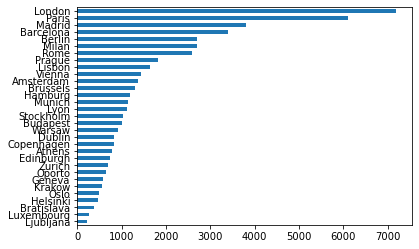

In [59]:
#посмотрим на распределение признака city:
df['city'].value_counts(ascending=True).plot(kind='barh')

Поскольку города один из интересных категориальных признаков, попробуем сделать 2 варианта - преобразовать столбец city в dummy-переменные по топ 10 городам и по всем. Для этого сделаем две копии датафрейма: df1 для модели по топ 10 городам и df2 для модели с dummy переменными по всем городам. В последствии сравним МАЕ.


In [60]:
df1=df.copy()


In [120]:
df2=df.copy()

## Работа по варианту 1

In [61]:
#Выберем топ 10 городов, а остальные заменим на other
topcitylist = df1['city'].value_counts()[0:10].index
allcitylist = df1['city'].value_counts().index
citylisttodrop = list(set(allcitylist) - set(topcitylist))

df1.loc[df1['city'].isin(citylisttodrop), 'city'] = 'other'
df1['city'] = df1['city'].apply(lambda x: x.lower())

df1['city'].value_counts()


other        16597
london        7193
paris         6108
madrid        3813
barcelona     3395
berlin        2705
milan         2694
rome          2589
prague        1816
lisbon        1647
vienna        1443
Name: city, dtype: int64

<AxesSubplot:>

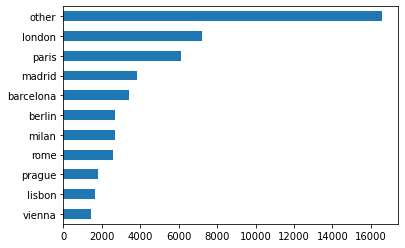

In [62]:
#посмотрим теперь на распределение признака city:
df1['city'].value_counts(ascending=True).plot(kind='barh')

In [63]:
#преобразуем столбец city в dummy-переменные:

df1 = pd.get_dummies(df1, columns=['city'])
df1.head()

,id,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,rating,...,city_berlin,city_lisbon,city_london,city_madrid,city_milan,city_other,city_paris,city_prague,city_rome,city_vienna
0,id_0,"[Bar, Pub]",12963.0,2.0,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,0,0,0,0,0,0,1,0,0,0
1,id_1,"[European, Scandinavian, Gluten Free Options, ...",106.0,2.0,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,0,0,0,0,0,1,0,0,0,0
2,id_2,[Vegetarian Friendly],810.0,2.0,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,...,0,0,0,0,0,1,0,0,0,0
3,id_3,"[Italian, Mediterranean, European, Vegetarian ...",1669.0,3.0,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,...,0,0,1,0,0,0,0,0,0,0
4,id_4,"[Italian, Mediterranean, European, Seafood, Ve...",37.0,3.0,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,...,0,0,0,0,0,1,0,0,0,0


In [64]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       50000 non-null  object        
 1   cuisine_style            50000 non-null  object        
 2   ranking                  50000 non-null  float64       
 3   price_range              50000 non-null  float64       
 4   number_of_reviews        50000 non-null  float64       
 5   reviews                  50000 non-null  object        
 6   url_ta                   50000 non-null  object        
 7   id_ta                    50000 non-null  object        
 8   sample                   50000 non-null  int64         
 9   rating                   50000 non-null  float64       
 10  number_of_reviews_isnan  50000 non-null  uint8         
 11  reviews_isnan            50000 non-null  uint8         
 12  price_range_isnan        50000 n

In [65]:
#сделаем копию, чтобы проверить МАЕ
df1_1 = df1.copy()
#признак id может быть значим, поэтому преобразуем его в цифровой
df1_1.id = df1_1.id.str.replace('id_','')
df1_1.id = pd.to_numeric(df1_1.id)

#и удалим все не цифровые значения
df1_1 = df1_1.drop([ 'cuisine_style', 'reviews', 'url_ta', 'id_ta','date_rev',
                    'rev_1', 'rev_2'], axis=1)
df1_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       50000 non-null  int64  
 1   ranking                  50000 non-null  float64
 2   price_range              50000 non-null  float64
 3   number_of_reviews        50000 non-null  float64
 4   sample                   50000 non-null  int64  
 5   rating                   50000 non-null  float64
 6   number_of_reviews_isnan  50000 non-null  uint8  
 7   reviews_isnan            50000 non-null  uint8  
 8   price_range_isnan        50000 non-null  uint8  
 9   cuisine_style_isnan      50000 non-null  uint8  
 10  cuis_num                 50000 non-null  int64  
 11  days                     50000 non-null  float64
 12  days_dif                 50000 non-null  float64
 13  city_barcelona           50000 non-null  uint8  
 14  city_berlin           

## Работа по варианту 2

In [121]:
#преобразуем столбец city в dummy-переменные:
df2['city'] = df2['city'].apply(lambda x: x.lower())
df2 = pd.get_dummies(df2, columns=['city'])
df2.head()

,id,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,rating,...,city_munich,city_oporto,city_oslo,city_paris,city_prague,city_rome,city_stockholm,city_vienna,city_warsaw,city_zurich
0,id_0,"[Bar, Pub]",12963.0,2.0,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,0,0,0,1,0,0,0,0,0,0
1,id_1,"[European, Scandinavian, Gluten Free Options, ...",106.0,2.0,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,id_2,[Vegetarian Friendly],810.0,2.0,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,id_3,"[Italian, Mediterranean, European, Vegetarian ...",1669.0,3.0,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,id_4,"[Italian, Mediterranean, European, Seafood, Ve...",37.0,3.0,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [122]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       50000 non-null  object        
 1   cuisine_style            50000 non-null  object        
 2   ranking                  50000 non-null  float64       
 3   price_range              50000 non-null  float64       
 4   number_of_reviews        50000 non-null  float64       
 5   reviews                  50000 non-null  object        
 6   url_ta                   50000 non-null  object        
 7   id_ta                    50000 non-null  object        
 8   sample                   50000 non-null  int64         
 9   rating                   50000 non-null  float64       
 10  number_of_reviews_isnan  50000 non-null  uint8         
 11  reviews_isnan            50000 non-null  uint8         
 12  price_range_isnan        50000 n

In [123]:
#сделаем копию, чтобы проверить МАЕ
df2_2 = df2.copy()
#признак id может быть значим, поэтому преобразуем его в цифровой
df2_2.id = df2_2.id.str.replace('id_','')
df2_2.id = pd.to_numeric(df2_2.id)

df2_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       50000 non-null  int64         
 1   cuisine_style            50000 non-null  object        
 2   ranking                  50000 non-null  float64       
 3   price_range              50000 non-null  float64       
 4   number_of_reviews        50000 non-null  float64       
 5   reviews                  50000 non-null  object        
 6   url_ta                   50000 non-null  object        
 7   id_ta                    50000 non-null  object        
 8   sample                   50000 non-null  int64         
 9   rating                   50000 non-null  float64       
 10  number_of_reviews_isnan  50000 non-null  uint8         
 11  reviews_isnan            50000 non-null  uint8         
 12  price_range_isnan        50000 n

In [124]:
#удалим не-числовые столбцы

df2_2 = df2_2.drop(['cuisine_style', 'reviews', 'url_ta', 'id_ta','date_rev',
                    'rev_1', 'rev_2'], axis=1)
df2_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       50000 non-null  int64  
 1   ranking                  50000 non-null  float64
 2   price_range              50000 non-null  float64
 3   number_of_reviews        50000 non-null  float64
 4   sample                   50000 non-null  int64  
 5   rating                   50000 non-null  float64
 6   number_of_reviews_isnan  50000 non-null  uint8  
 7   reviews_isnan            50000 non-null  uint8  
 8   price_range_isnan        50000 non-null  uint8  
 9   cuisine_style_isnan      50000 non-null  uint8  
 10  cuis_num                 50000 non-null  int64  
 11  days                     50000 non-null  float64
 12  days_dif                 50000 non-null  float64
 13  city_amsterdam           50000 non-null  uint8  
 14  city_athens           

### Сравним варианты 1 и 2 по МАЕ

для df1_1 MAE: 0.25282253273809524

для df2_2 MAE: 0.20961562499999997

ВЫВОД: уменьшать количество городов до топ 10 не целесообразно
    
Для продолжения работы копируем датасет df2_2 в df3, который теперь буедт основным

In [125]:
df3=df2_2.copy()
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       50000 non-null  int64  
 1   ranking                  50000 non-null  float64
 2   price_range              50000 non-null  float64
 3   number_of_reviews        50000 non-null  float64
 4   sample                   50000 non-null  int64  
 5   rating                   50000 non-null  float64
 6   number_of_reviews_isnan  50000 non-null  uint8  
 7   reviews_isnan            50000 non-null  uint8  
 8   price_range_isnan        50000 non-null  uint8  
 9   cuisine_style_isnan      50000 non-null  uint8  
 10  cuis_num                 50000 non-null  int64  
 11  days                     50000 non-null  float64
 12  days_dif                 50000 non-null  float64
 13  city_amsterdam           50000 non-null  uint8  
 14  city_athens           

## Посмотрим распределение признака

<AxesSubplot:>

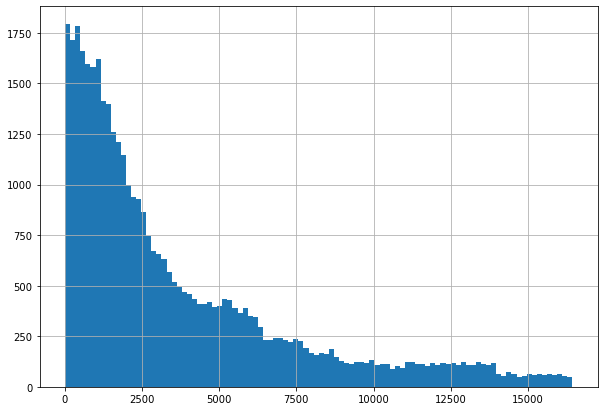

In [92]:

plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

<AxesSubplot:>

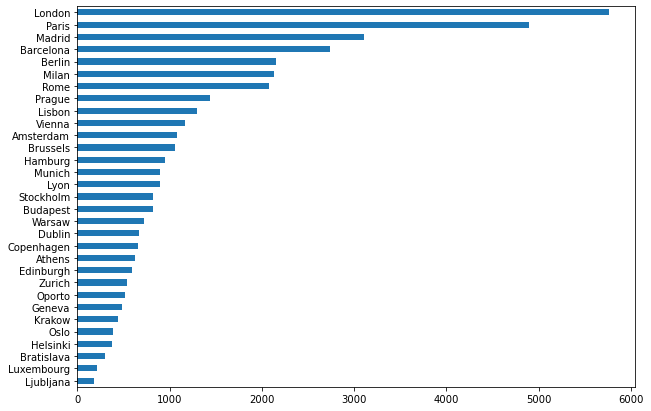

In [93]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

Посмотрим, как изменится распределение в большом городе:

<AxesSubplot:>

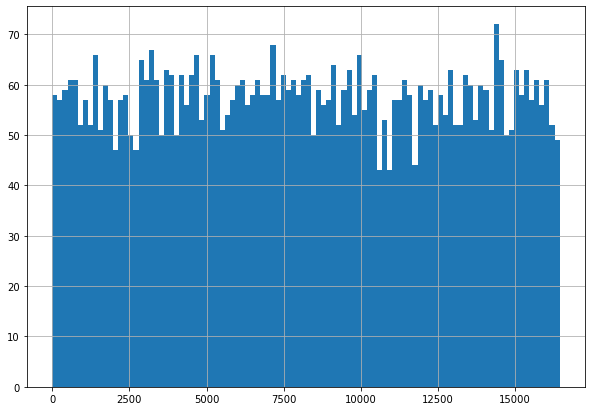

In [94]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

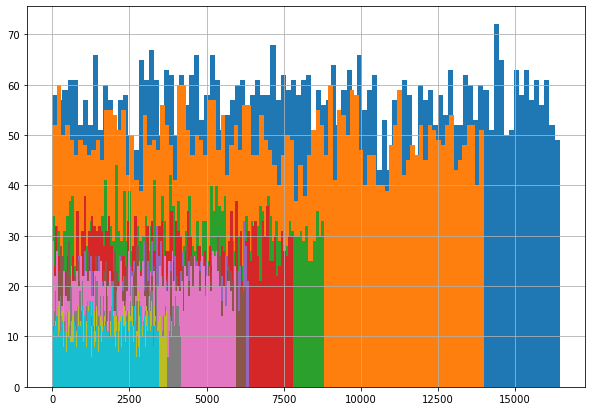

In [95]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.



In [102]:
#Посмотрим разные группы признаков визуально

In [96]:
df_train[['City', 'Number of Reviews']].groupby('City').describe()

Number of Reviews                                            \
                       count        mean         std  min   25%    50%   
City                                                                     
Amsterdam             1036.0  146.630309  338.109346  2.0  12.0   47.0   
Athens                 589.0   98.538200  305.974968  2.0   7.0   20.0   
Barcelona             2547.0  132.534747  302.862678  2.0   9.0   34.0   
Berlin                1951.0   66.522809  177.952850  2.0   6.0   16.0   
Bratislava             258.0   53.089147  182.859123  2.0   5.0   10.0   
Brussels               988.0   89.090081  190.831490  2.0   9.0   28.0   
Budapest               749.0  159.106809  455.589395  2.0   8.0   24.0   
Copenhagen             623.0   90.686998  143.162781  2.0   9.0   35.0   
Dublin                 639.0  155.654147  326.992773  2.0  11.0   44.0   
Edinburgh              579.0  232.112263  400.048249  2.0  15.0   73.0   
Geneva                 446.0   62.316143  119.847191  2.0   9.0   31.0   
Hamburg                873.0   46.478809   91.956947  2.0   6.0   16.0   
Helsinki               352.0   60.375000  132.427828  2.0   8.0   20.0   
Krakow                 415.0  120.566265  238.277869  2.0   8.5   28.0   
Lisbon                1215.0  126.506173  284.680120  2.0   9.0   31.0   
Ljubljana              168.0   75.273810  142.260859  2.0   8.0   18.5   
London                5408.0  137.969490  332.614434  2.0   9.0   38.0   
Luxembourg             197.0   82.152284  118.130493  2.0  10.0   34.0   
Lyon                   851.0   85.955347  154.051482  2.0  10.0   31.0   
Madrid                2915.0  100.053173  255.455725  2.0   8.0   27.0   
Milan                 2030.0  173.712808  340.076991  2.0  12.0   50.0   
Munich                 828.0   81.281401  226.135868  2.0  10.0   29.0   
Oporto                 478.0  135.939331  305.714331  2.0   9.0   39.5   
Oslo                   366.0   94.931694  183.356060  2.0  10.0   28.0   
Paris                 4673.0  120.146373  240.782907  2.0  12.0   46.0   
Prague                1282.0  124.028861  343.627303  2.0   6.0   20.0   
Rome                  2019.0  289.243685  496.830415  2.0  34.0  117.0   
Stockholm              758.0   77.935356  175.731157  2.0   6.0   19.0   
Vienna                1067.0   83.792877  252.341034  2.0   7.0   22.0   
Warsaw                 652.0   64.676380  175.848484  2.0   6.0   17.0   
Zurich                 505.0   77.558416  138.036906  2.0  11.0   32.0   

                            
               75%     max  
City                        
Amsterdam   146.25  6777.0  
Athens       67.00  4234.0  
Barcelona   125.00  4738.0  
Berlin       51.00  2572.0  
Bratislava   31.25  2578.0  
Brussels     89.25  2140.0  
Budapest    115.00  7575.0  
Copenhagen  107.00  1316.0  
Dublin      156.00  3491.0  
Edinburgh   270.50  4035.0  
Geneva       74.00  1624.0  
Hamburg      42.00   845.0  
Helsinki     51.75  1488.0  
Krakow      134.50  2197.0  
Lisbon      108.50  3404.0  
Ljubljana    60.25   816.0  
London      132.25  9660.0  
Luxembourg   95.00   652.0  
Lyon         92.50  1953.0  
Madrid       89.00  6013.0  
Milan       214.00  6360.0  
Munich       75.00  4694.0  
Oporto      136.00  3206.0  
Oslo         92.00  1391.0  
Paris       130.00  7622.0  
Prague       77.75  4521.0  
Rome        356.50  8927.0  
Stockholm    62.75  1461.0  
Vienna       68.50  4937.0  
Warsaw       45.25  2356.0  
Zurich       88.00  1974.0

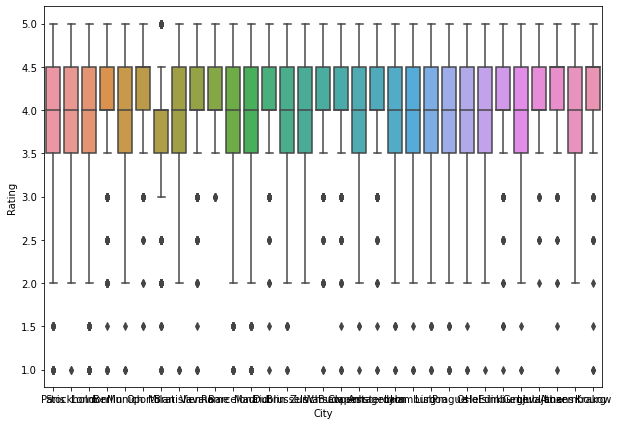

In [97]:
sns.boxplot(x='City', y='Rating', data=df_train);

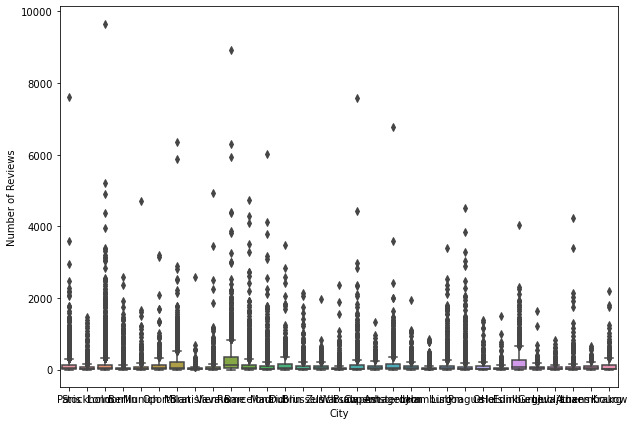

In [101]:
sns.boxplot(x='City', y='Number of Reviews', data=df_train);

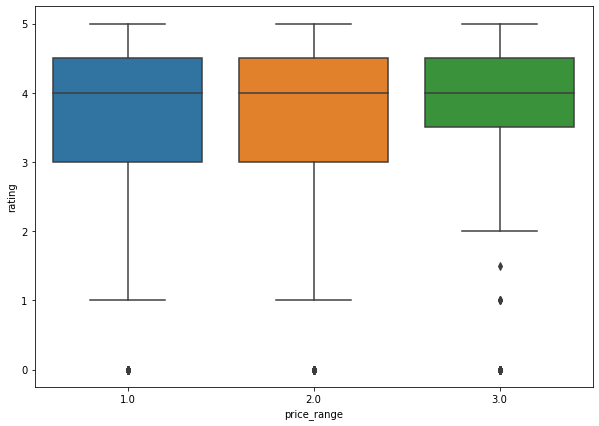

In [100]:
sns.boxplot(x='price_range', y='rating', data=df);

In [103]:
# По сути все эти визуальные представления только подтверждают очевидные вещи,
#никаких интересных наблюдений-выводов

### Посмотрим распределение целевой переменной

<AxesSubplot:>

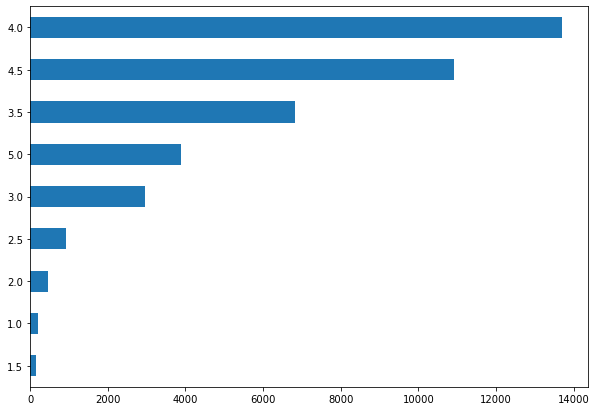

In [110]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

<AxesSubplot:>

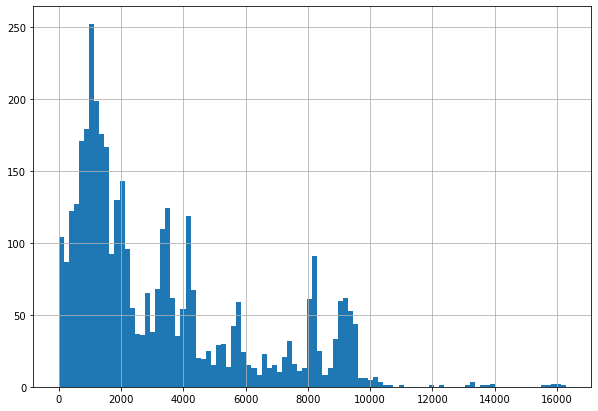

In [111]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

<AxesSubplot:>

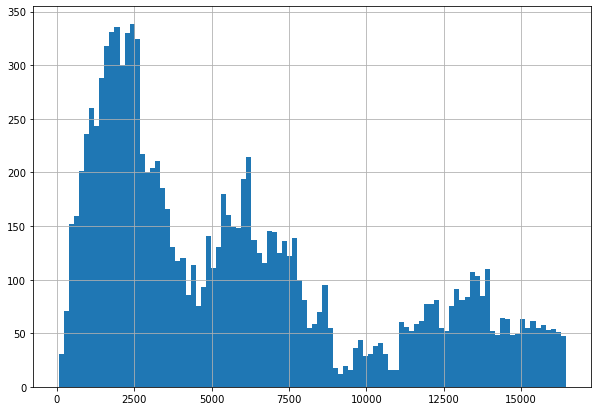

In [89]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

<AxesSubplot:>

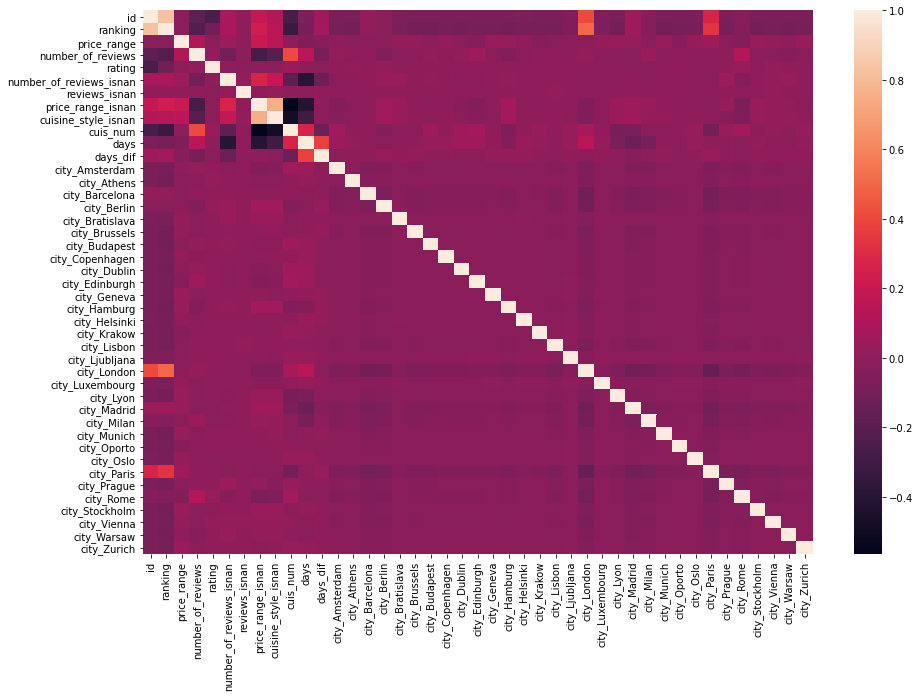

In [114]:
import seaborn as sns


plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(df3.drop(['sample'], axis=1).corr(),)

Очевидно, что городов слишком много в этой матрице и они не сильно коррелируют.
Попробуем поисключать элементы из корр.анализа 

In [116]:
# Сформируем 1 список признаков, которые исключаем из корреляционного анализа
cols_to_drop_1 = ['sample', 'city_amsterdam', 'city_athens', 'city_barcelona', 
                  'city_berlin', 'city_bratislava', 'city_brussels', 
                  'city_budapest', 'city_copenhagen', 'city_dublin', 
                  'city_edinburgh', 'city_geneva', 'city_hamburg', 
                  'city_helsinki', 'city_krakow', 'city_lisbon', 'city_ljubljana',
                  'city_london', 'city_luxembourg', 'city_lyon', 'city_madrid', 
                  'city_milan', 'city_munich', 'city_oporto', 'city_oslo', 
                  'city_paris', 'city_prague', 'city_rome', 'city_stockholm', 
                  'city_vienna', 'city_warsaw','city_zurich',]


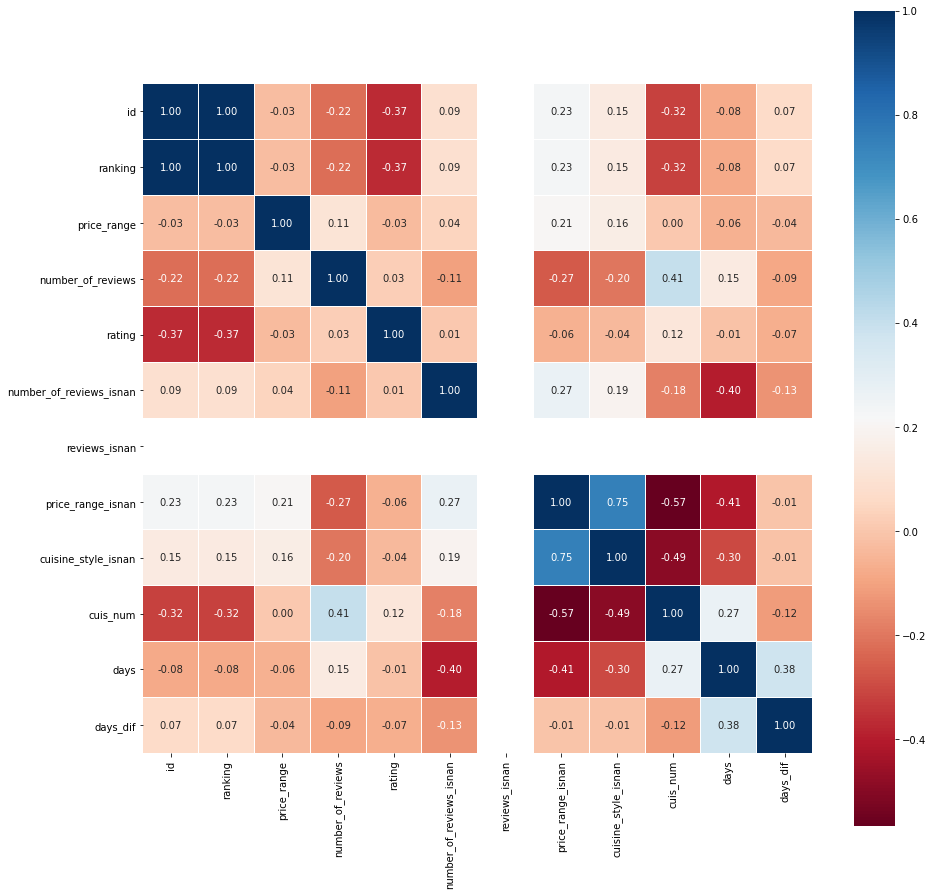

In [127]:
plt.rcParams['figure.figsize'] = (15,15)
df_corr = df3.copy()
sns.heatmap(df_corr[df_corr['sample']== 1].drop(cols_to_drop_1, axis=1).corr(), square=True,
            annot=True, fmt=".2f", linewidths=0.1, cmap="RdBu");

Rating (наша целевая переменная) сильнее всего (отрицательно, что интересно)коррелирует только с ranking и id, то есть с ranking'ом ресторана.
На втором месте - положительная корреляция с признаком количества кухонь.(очевидно, чем больше кухонь, тем выше рейтинг)

Попробуем проверить есть ли корреляция с городами.На общем heatmap выше видно, что выделяются Лондон и Париж - возмоно, есть корреляция с топ городами.


Сделаем новый список cols_to_drop_2 на основе списка топ-городов, которые мы использовали для df1_1

In [137]:
topcities_column_lst = df1_1.columns.tolist()
topcities_column_lst

['id',
 'ranking',
 'price_range',
 'number_of_reviews',
 'sample',
 'rating',
 'number_of_reviews_isnan',
 'reviews_isnan',
 'price_range_isnan',
 'cuisine_style_isnan',
 'cuis_num',
 'days',
 'days_dif',
 'city_barcelona',
 'city_berlin',
 'city_lisbon',
 'city_london',
 'city_madrid',
 'city_milan',
 'city_other',
 'city_paris',
 'city_prague',
 'city_rome',
 'city_vienna']

In [142]:
cols_to_drop_2 = list(set(cols_to_drop_1)-set(topcities_column_lst))
cols_to_drop_2.append('sample')
cols_to_drop_2

['city_lyon',
 'city_warsaw',
 'city_stockholm',
 'city_geneva',
 'city_oporto',
 'city_dublin',
 'city_luxembourg',
 'city_athens',
 'city_amsterdam',
 'city_zurich',
 'city_krakow',
 'city_hamburg',
 'city_oslo',
 'city_edinburgh',
 'city_brussels',
 'city_munich',
 'city_bratislava',
 'city_ljubljana',
 'city_helsinki',
 'city_budapest',
 'city_copenhagen',
 'sample']

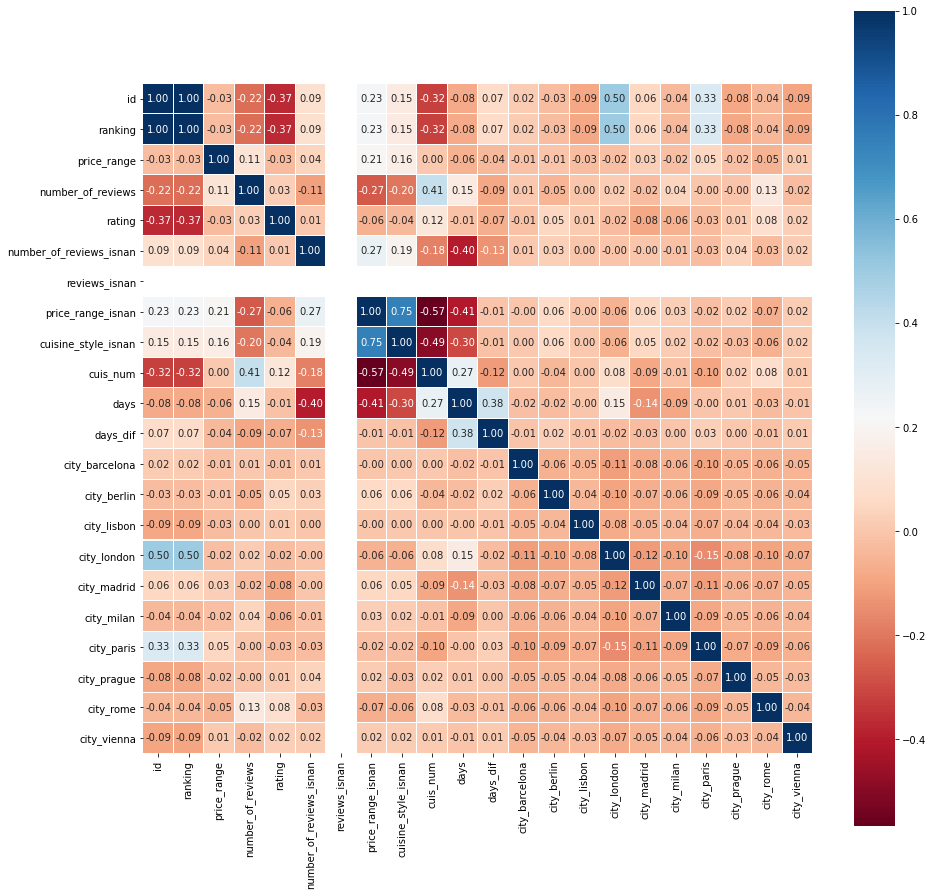

In [143]:
plt.rcParams['figure.figsize'] = (15,15)
df_corr = df3.copy()
sns.heatmap(df_corr[df_corr['sample']== 1].drop(cols_to_drop_2, axis=1).corr(), square=True,
            annot=True, fmt=".2f", linewidths=0.1, cmap="RdBu");

C рейтингом города, к сожалению, значимо не коррелируют.
Там явно прослеживаются инетерсные взимосвязи между признаками, но они не являются целевой, поэтому дальнейший анализ проводить не целесообразно

# Data Prepocessing

In [144]:
df_preproc = df3
df_preproc.sample()

,id,ranking,price_range,number_of_reviews,sample,rating,number_of_reviews_isnan,reviews_isnan,price_range_isnan,cuisine_style_isnan,...,city_munich,city_oporto,city_oslo,city_paris,city_prague,city_rome,city_stockholm,city_vienna,city_warsaw,city_zurich
49531,238,239.0,2.0,125.0,1,4.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [145]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       50000 non-null  int64  
 1   ranking                  50000 non-null  float64
 2   price_range              50000 non-null  float64
 3   number_of_reviews        50000 non-null  float64
 4   sample                   50000 non-null  int64  
 5   rating                   50000 non-null  float64
 6   number_of_reviews_isnan  50000 non-null  uint8  
 7   reviews_isnan            50000 non-null  uint8  
 8   price_range_isnan        50000 non-null  uint8  
 9   cuisine_style_isnan      50000 non-null  uint8  
 10  cuis_num                 50000 non-null  int64  
 11  days                     50000 non-null  float64
 12  days_dif                 50000 non-null  float64
 13  city_amsterdam           50000 non-null  uint8  
 14  city_athens           

In [146]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.rating.values            # наш таргет
X = train_data.drop(['rating'], axis=1)

Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 



In [147]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=RANDOM_SEED)

In [148]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 43), (40000, 43), (40000, 42), (32000, 42), (8000, 42))

# Model 
Сам ML

In [149]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [150]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, 
                              n_jobs=-1, random_state=RANDOM_SEED)

In [151]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в 
#тестовой выборке. Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [152]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим 
# насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение 
# предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.20961562499999997


<AxesSubplot:>

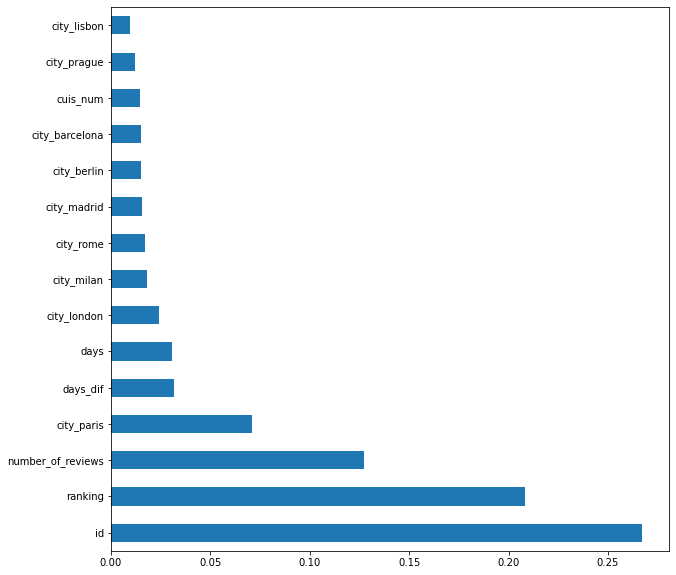

In [153]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [159]:
test_data.sample(10)

,id,ranking,price_range,number_of_reviews,rating,number_of_reviews_isnan,reviews_isnan,price_range_isnan,cuisine_style_isnan,cuis_num,...,city_munich,city_oporto,city_oslo,city_paris,city_prague,city_rome,city_stockholm,city_vienna,city_warsaw,city_zurich
8553,8553,900.0,2.0,27.0,0.0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
8517,8517,8816.0,2.0,9.0,0.0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1298,1298,3894.0,1.0,34.0,0.0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
4878,4878,2024.0,2.0,13.0,0.0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4569,4569,1085.0,1.0,43.0,0.0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
4239,4239,3838.0,3.0,10.0,0.0,0,0,0,0,4,...,0,0,0,0,0,1,0,0,0,0
5294,5294,1033.0,3.0,136.0,0.0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
9185,9185,1605.0,2.0,1.0,0.0,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
8488,8488,1125.0,2.0,477.0,0.0,0,0,0,0,4,...,0,0,0,0,1,0,0,0,0,0
6069,6069,499.0,2.0,38.0,0.0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0


In [160]:
test_data = test_data.drop(['rating'], axis=1)

In [161]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [165]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [166]:
predict_submission

array([4.38 , 4.325, 4.565, ..., 2.58 , 3.265, 4.045])

In [164]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,4.380
1,id_1,4.325
2,id_2,4.565
3,id_3,4.365
4,id_4,4.475
5,id_5,4.495
6,id_6,4.090
7,id_7,3.830
8,id_8,4.530
9,id_9,4.650
